In [1]:
import pandas as pd

In [2]:
# считаем описание данных
df = pd.read_csv('02_otp_desc.csv', sep=';').loc[:,'ПОЛЕ':'ОПИСАНИЕ']

In [3]:
df

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,TARGET,целевая переменная:отклик на маркетинговую кам...
2,AGE,возраст клиента
3,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
4,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
5,GENDER,пол клиента
6,CHILD_TOTAL,количество детей клиента
7,DEPENDANTS,количество иждивенцев клиента
8,EDUCATION,образование
9,MARITAL_STATUS,семейное положение


In [4]:
# считаем все-все данные

In [5]:
train = pd.read_csv('02_otp_train.csv', sep=';')

In [6]:
train.shape

(15223, 52)

In [7]:
test = pd.read_csv('02_otp_test.csv', sep=';')

In [8]:
test.shape

(14910, 51)

In [9]:
# отделим таргет от TRAIN-а

In [10]:
y = train['TARGET']

In [11]:
train = train.drop('TARGET', axis=1)

In [12]:
# соеденим train и test

In [13]:
all_data = pd.concat([train, test])

In [14]:
# необходимо удалить индекс, 
# у нас есть 0-строка в train и 0-строка в test (и так далее 1,2,3,4)
# если мы просто объеденим - у нас сохранятся индексы
# мы же просто уберем индекс и автоматически создастся новый индекс, сквозной и уникальный
all_data = all_data.reset_index(drop=True)

In [15]:
# посмотрим типы данных и их заполняемость

In [16]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_P

In [17]:
# Видим, что часть данных - object, скорее всего стоки.
# Давайте выведем эти значения для каждого столбца

In [18]:
for i in all_data.columns: # перебираем все столбцы
    if str(all_data[i].dtype) == 'object': # если тип столбца - object
        print(i) # выводим название столбца
        print(set(all_data[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print() # выводим пустую строку

EDUCATION
{'Среднее', 'Неполное среднее', 'Высшее', 'Ученая степень', 'Неоконченное высшее', 'Два и более высших образования', 'Среднее специальное'}

MARITAL_STATUS
{'Не состоял в браке', 'Разведен(а)', 'Гражданский брак', 'Состою в браке', 'Вдовец/Вдова'}

GEN_INDUSTRY
{nan, 'Подбор персонала', 'Маркетинг', 'Сельское хозяйство', 'Здравоохранение', 'Информационные услуги', 'Государственная служба', 'Металлургия/Промышленность/Машиностроение', 'Транспорт', 'Сборочные производства', 'Образование', 'Страхование', 'ЧОП/Детективная д-ть', 'Другие сферы', 'Ресторанный бизнес/Общественное питание', 'СМИ/Реклама/PR-агенства', 'Энергетика', 'Управляющая компания', 'Наука', 'Развлечения/Искусство', 'Химия/Парфюмерия/Фармацевтика', 'Логистика', 'Торговля', 'Салоны красоты и здоровья', 'Строительство', 'Банк/Финансы', 'Недвижимость', 'Юридические услуги/нотариальные услуги', 'Коммунальное хоз-во/Дорожные службы', 'Туризм', 'Нефтегазовая промышленность', 'Информационные технологии'}

GEN_TITLE
{na

In [19]:
# можно заметить что некоторые переменные, 
# которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа,
# но по какой-то (ниже увидим) причине были распознаны как строки

In [20]:
all_data['PERSONAL_INCOME'] = all_data['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [21]:
# причина же что использовалась запятая для разделения не целой части числа

In [22]:
all_data['CREDIT'] = all_data['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['FST_PAYMENT'] = all_data['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_AVG_DLQ_AMT'] = all_data['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_MAX_DLQ_AMT'] = all_data['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [23]:
# запускаем повторно код и смотрим, какие столбцы с какими строковыми значениями остались

In [24]:
for i in all_data.columns:
    if str(all_data[i].dtype) == 'object':
        print(i)
        print(set(all_data[i]))
        print()

EDUCATION
{'Среднее', 'Неполное среднее', 'Высшее', 'Ученая степень', 'Неоконченное высшее', 'Два и более высших образования', 'Среднее специальное'}

MARITAL_STATUS
{'Не состоял в браке', 'Разведен(а)', 'Гражданский брак', 'Состою в браке', 'Вдовец/Вдова'}

GEN_INDUSTRY
{nan, 'Подбор персонала', 'Маркетинг', 'Сельское хозяйство', 'Здравоохранение', 'Информационные услуги', 'Государственная служба', 'Металлургия/Промышленность/Машиностроение', 'Транспорт', 'Сборочные производства', 'Образование', 'Страхование', 'ЧОП/Детективная д-ть', 'Другие сферы', 'Ресторанный бизнес/Общественное питание', 'СМИ/Реклама/PR-агенства', 'Энергетика', 'Управляющая компания', 'Наука', 'Развлечения/Искусство', 'Химия/Парфюмерия/Фармацевтика', 'Логистика', 'Торговля', 'Салоны красоты и здоровья', 'Строительство', 'Банк/Финансы', 'Недвижимость', 'Юридические услуги/нотариальные услуги', 'Коммунальное хоз-во/Дорожные службы', 'Туризм', 'Нефтегазовая промышленность', 'Информационные технологии'}

GEN_TITLE
{na

# Данные готовы, теперь вам предлагается начать решать задачу

In [25]:
# Есть ли пропуски в данных? что с ними сделать?

# Ваш код :-)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_

In [26]:
all_data[~all_data['WORK_TIME'].isnull()][['WORK_TIME','AGE','EDUCATION','GENDER','CHILD_TOTAL','MARITAL_STATUS','GEN_TITLE','JOB_DIR','GEN_INDUSTRY']]

,WORK_TIME,AGE,EDUCATION,GENDER,CHILD_TOTAL,MARITAL_STATUS,GEN_TITLE,JOB_DIR,GEN_INDUSTRY
0,18.0,49,Среднее специальное,1,2,Состою в браке,Рабочий,Вспомогательный техперсонал,Торговля
1,97.0,32,Среднее,1,3,Состою в браке,Рабочий,Участие в основ. деятельности,Торговля
2,84.0,52,Неполное среднее,1,4,Состою в браке,Специалист,Участие в основ. деятельности,Информационные технологии
3,168.0,39,Высшее,1,1,Состою в браке,Руководитель среднего звена,Участие в основ. деятельности,Образование
4,101.0,30,Среднее,0,0,Состою в браке,Специалист,Участие в основ. деятельности,Государственная служба
5,40.0,29,Среднее,0,0,Гражданский брак,Специалист,Адм-хоз. и трансп. службы,Торговля
6,6.0,35,Высшее,0,1,Разведен(а),Специалист,Участие в основ. деятельности,Другие сферы
7,6.0,41,Среднее,1,0,Состою в браке,Рабочий,Участие в основ. деятельности,Сельское хозяйство
8,156.0,53,Высшее,0,2,Состою в браке,Руководитель высшего звена,Участие в основ. деятельности,Здравоохранение
9,72.0,43,Среднее специальное,1,0,Состою в браке,Специалист,Участие в основ. деятельности,Образование


In [27]:
all_data.GEN_TITLE[all_data['GEN_TITLE'].isnull()] = 'Другое'

C:\Users\eagle\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [28]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     30133 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_

In [29]:
all_data.GEN_INDUSTRY.fillna("Другое",inplace=True)
all_data.GEN_TITLE.fillna("Другое",inplace=True)
all_data.ORG_TP_FCAPITAL.fillna("Другое",inplace=True)
all_data.ORG_TP_STATE.fillna("Другое",inplace=True)
all_data.JOB_DIR.fillna("Другое",inplace=True)
all_data.TP_PROVINCE.fillna("Другое",inplace=True)
all_data.WORK_TIME.fillna(all_data.WORK_TIME.mean(),inplace=True)
all_data.PREVIOUS_CARD_NUM_UTILIZED.fillna(0,inplace=True)
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  30133 non-null object
GEN_TITLE                     30133 non-null object
ORG_TP_STATE                  30133 non-null object
ORG_TP_FCAPITAL               30133 non-null object
JOB_DIR                       30133 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null float64
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_

In [30]:
# Как поступить со строковыми переменными?

# Ваш код :-)
for i in all_data.columns:
    if str(all_data[i].dtype) == 'object':
        print (i)
tmp = pd.get_dummies(all_data)
tmp.info()

EDUCATION
MARITAL_STATUS
GEN_INDUSTRY
GEN_TITLE
ORG_TP_STATE
ORG_TP_FCAPITAL
JOB_DIR
FAMILY_INCOME
REG_ADDRESS_PROVINCE
FACT_ADDRESS_PROVINCE
POSTAL_ADDRESS_PROVINCE
TP_PROVINCE
REGION_NM
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 448 entries, AGREEMENT_RK to REGION_NM_ЮЖНЫЙ
dtypes: float64(7), int64(31), uint8(410)
memory usage: 20.5 MB


In [31]:
# В итоге должны получиться данные без пропусков и только числовые
# dtypes: float64(7), int64(31), uint8(410)

In [32]:
# Вновь разделите на train и test (не мешая)

# Ваш код :-)
print (train.shape, test.shape, y.shape, tmp.shape, len(y))
trainnew = tmp[0 : len(y)]
testnew = tmp [len(y) - 1: -1]
print (trainnew.shape, testnew.shape, y.shape, tmp.shape, len(y))

(15223, 51) (14910, 51) (15223,) (30133, 448) 15223
(15223, 448) (14910, 448) (15223,) (30133, 448) 15223


In [33]:
# Сделать hold-out sampling на train выборке
from sklearn.cross_validation import train_test_split

# test_size=0.3, random_state=42

# Ваш код :-)
X_train, X_test, y_train, y_test = train_test_split(trainnew, y, test_size=0.3, random_state=42)

C:\Users\eagle\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [59]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Ваш код :-)
models = {}
predict = {}
predict_proba = {}

#lcsfr = [DecisionTreeClassifier(random_state=42), RandomForestClassifier(random_state=42), LogisticRegression(random_state=42)]
lcsfr = ['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression']
for namecsfr in lcsfr:
    models[namecsfr] = globals()[namecsfr]
    #print(type(f))
    l = models[namecsfr](random_state=42)
    l.fit(X_train, y_train)
    #s = str(namecsfr)    #print('> ', s[0:s.find('(')])
    predict[namecsfr] = l.predict(X_test)
    predict_proba[namecsfr] = l.predict_proba(X_test)
#print(predict)
#print(predict_proba)

In [60]:
# Посчитать метрики стандартные
# accuracy, precision, recall

# Ваш код :-)
print(lcsfr)
from sklearn.metrics import accuracy_score, precision_score, recall_score, auc
lmetr = pd.DataFrame(index=lcsfr, columns=['accuracy_score', 'precision_score', 'recall_score'])
for namecsfr in lcsfr:
    lmetr.accuracy_score[namecsfr] = accuracy_score(y_test, predict[namecsfr])
    lmetr.precision_score[namecsfr] = precision_score(y_test, predict[namecsfr])
    lmetr.recall_score[namecsfr] = recall_score(y_test, predict[namecsfr])
print(lmetr)

['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression']
                       accuracy_score precision_score recall_score
DecisionTreeClassifier       0.786512         0.14527     0.154955
RandomForestClassifier       0.874973        0.192308   0.00900901
LogisticRegression           0.878476               0            0


C:\Users\eagle\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


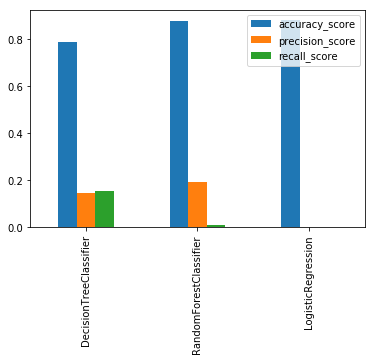

In [61]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)

# Ваш код :-)
%matplotlib inline

lmetr.plot(kind='bar')

In [62]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе

# Ваш код :-)
# Добавляем AUC в схему датафрейма
lcsfr.append('AUC')
lmetr['AUC']=0
print(lcsfr, lmetr)
lmetr.AUC
    


['DecisionTreeClassifier', 'RandomForestClassifier', 'LogisticRegression', 'AUC']                        accuracy_score precision_score recall_score  AUC
DecisionTreeClassifier       0.786512         0.14527     0.154955    0
RandomForestClassifier       0.874973        0.192308   0.00900901    0
LogisticRegression           0.878476               0            0    0


DecisionTreeClassifier    0
RandomForestClassifier    0
LogisticRegression        0
Name: AUC, dtype: int64

KeyError: 'AUC'

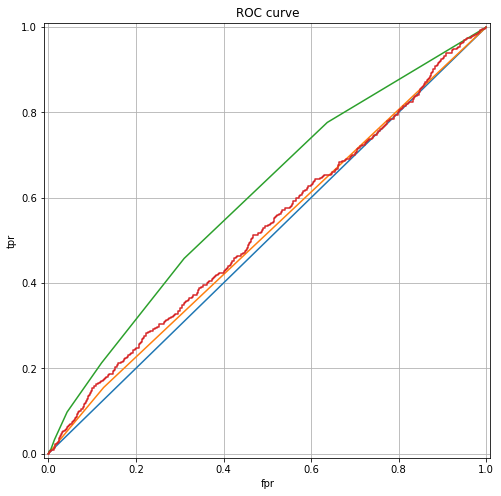

In [63]:
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

plt.figure(figsize=(8, 8))
plt.plot([0, 1], [0, 1])
plt.ylabel('tpr')
plt.xlabel('fpr')
plt.grid(True)
plt.title('ROC curve')
plt.xlim((-0.01, 1.01))
plt.ylim((-0.01, 1.01))

for namecsfr in lcsfr:
    fpr, tpr, thresholds = roc_curve(y_test, predict_proba[namecsfr][:,1])
    #lmetr.AUC[namecsfr] = roc_auc_score(y_test, predict_proba[namecsfr][:,1])
    plt.plot(fpr, tpr, label=namecsfr)
plt.legend()
lmetr

In [65]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc

# Ваш код :-)
for namecsfr in lcsfr:
    lmetr.CROSSVALROCAUC = cross_val_score(
        models[namecsfr],
        train,
        y,
        scoring='roc_auc',
        cv=10
    )
#lmetr.CROSSVALROCAUC

TypeError: get_params() missing 1 required positional argument: 'self'

In [37]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

# Ваш код :-)